In [1]:
from transformers import VisionEncoderDecoderModel
from transformers import ViTFeatureExtractor, RobertaTokenizer, TrOCRProcessor
from transformers import VisionEncoderDecoderModel
from transformers import TrOCRProcessor
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import os
import random
import cv2
fprop = fm.FontProperties(fname='/Users/dishantpadalia/Downloads/Mangal Regular/Mangal Regular.ttf')

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
encode = 'google/vit-base-patch16-224-in21k'
decode = 'flax-community/roberta-hindi'

In [3]:
feature_extractor=ViTFeatureExtractor.from_pretrained(encode)
tokenizer = RobertaTokenizer.from_pretrained(decode)
processor = TrOCRProcessor(feature_extractor=feature_extractor, tokenizer=tokenizer)

/Users/dishantpadalia/opt/miniconda3/envs/trocr/lib/python3.10/site-packages/transformers/models/trocr/processing_trocr.py:44: FutureWarning: The `feature_extractor` argument is deprecated and will be removed in v4.27, use `image_processor` instead.
  warnings.warn(


In [4]:
model = VisionEncoderDecoderModel.from_pretrained("/Users/dishantpadalia/IITB/random/checkpoint-30200")

In [24]:
home_dir = "/Users/dishantpadalia/IITB/random/IIIT-HW-Hindi_v1/HindiSeg/test"
image_paths = []
for i in os.listdir(home_dir):
    temp = os.path.join(home_dir, i)
    if os.path.isdir(temp):
        for j in os.listdir(temp):
            temp_2 = os.path.join(temp, j)
            if os.path.isdir(temp_2):
                for k in os.listdir(temp_2):
                    img_path = os.path.join(temp_2, k)
                    if img_path.endswith(".jpg"):
                        image_paths.append(img_path)

In [45]:
def preview_subplot():
    txts = []
    imgs = []
    selected_imgs = random.sample(image_paths, 25)
    
    for i_path in selected_imgs:
        image = Image.open(i_path).convert("RGB")
        pixel_values = processor(image, return_tensors="pt").pixel_values
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        txts.append(generated_text)
        imgs.append(image)
    
    plt.figure(figsize=(15,15))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(imgs[i])
        plt.title(txts[i], fontproperties=fprop, fontsize=15)
    plt.show()

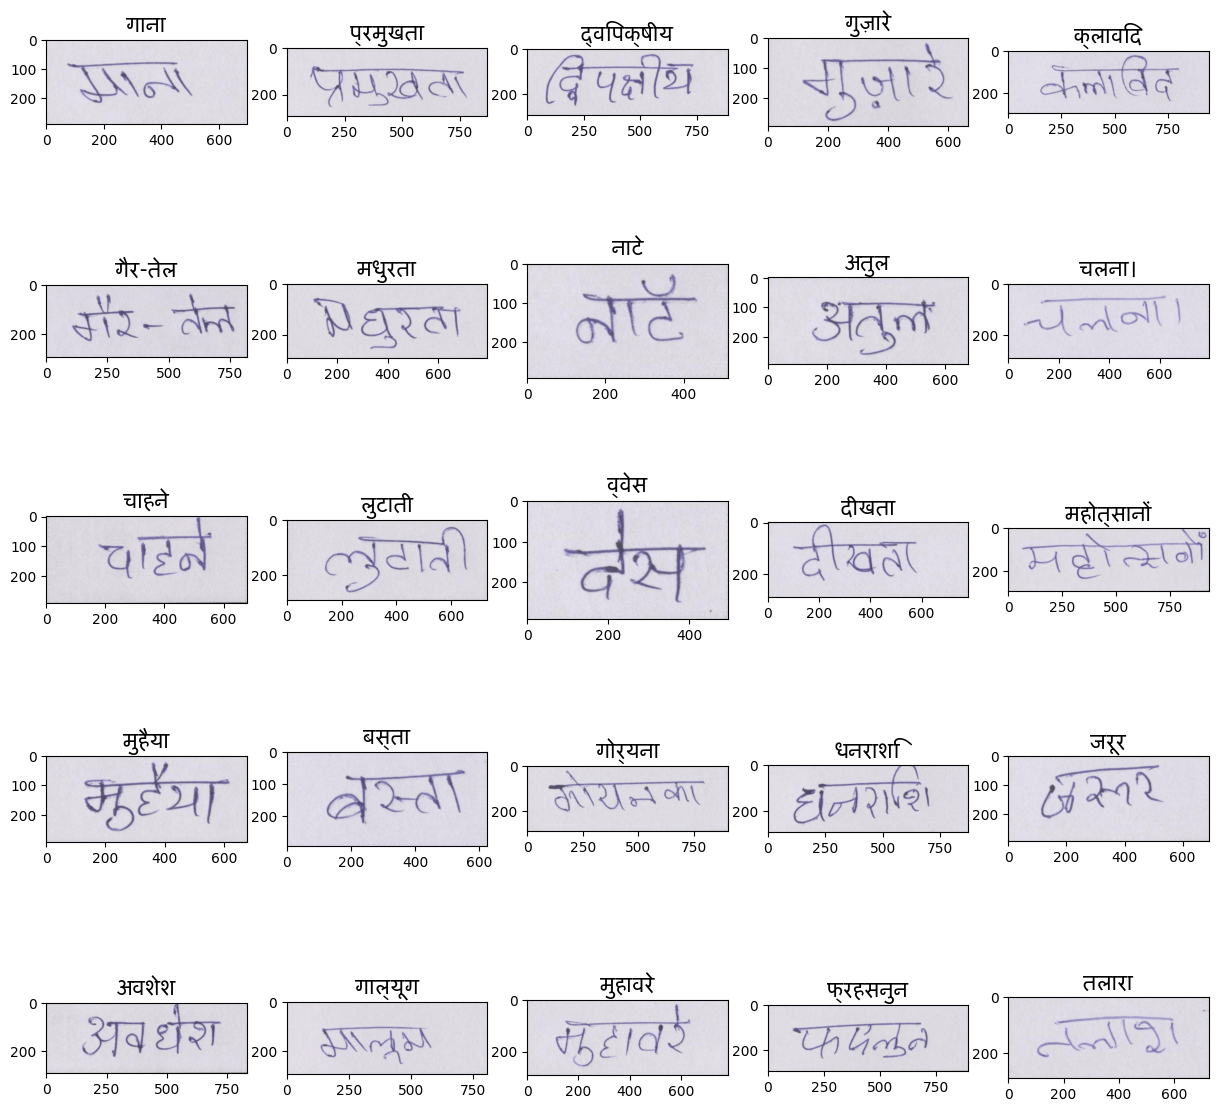

In [46]:
preview_subplot()

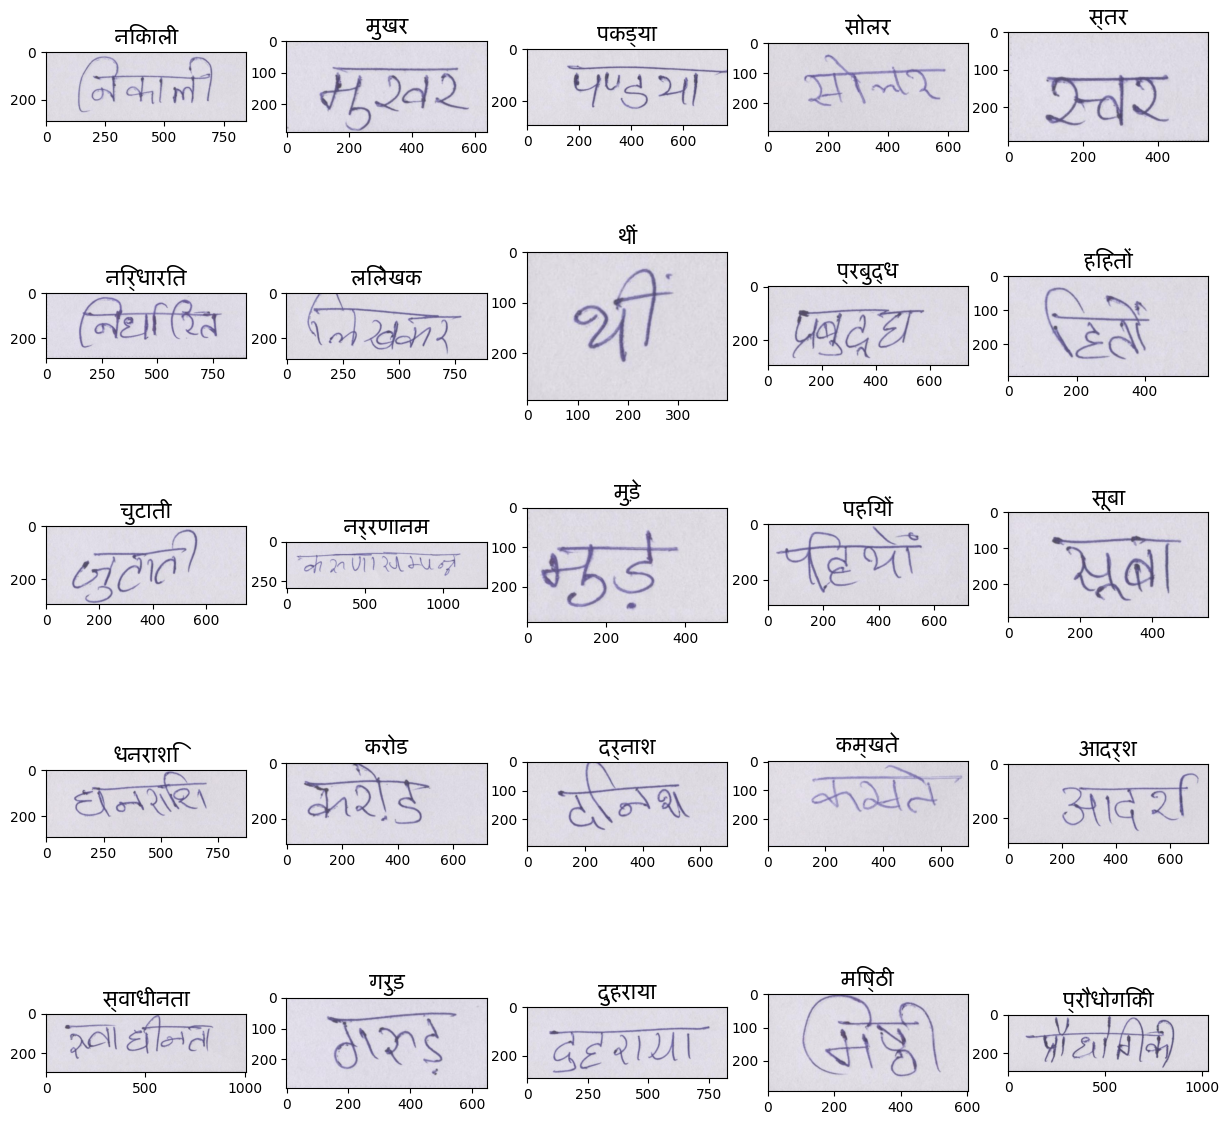

In [47]:
preview_subplot()

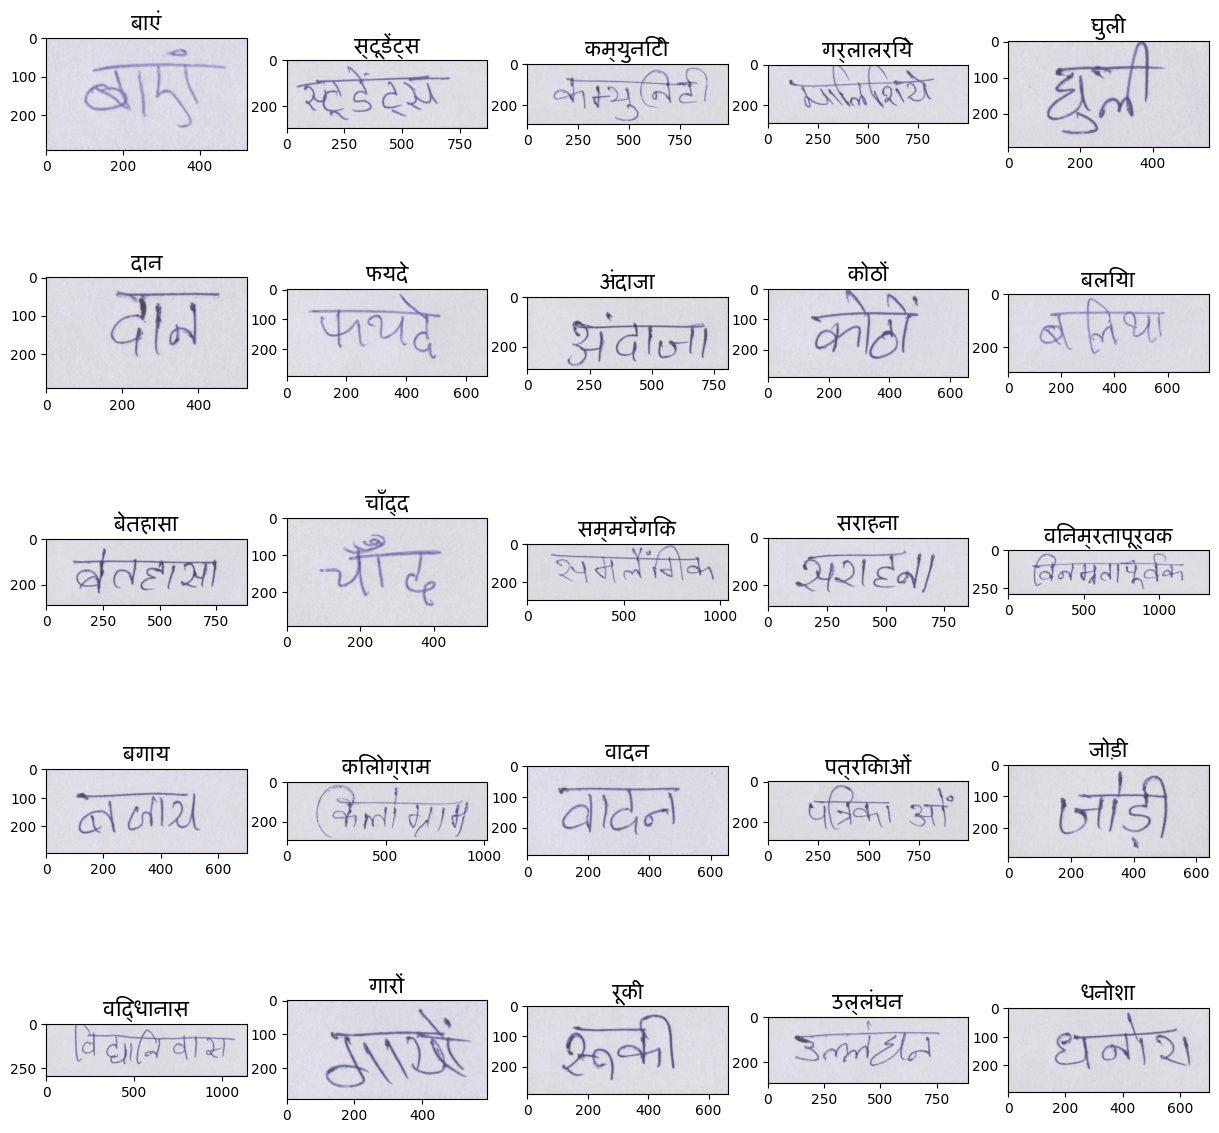

In [48]:
preview_subplot()

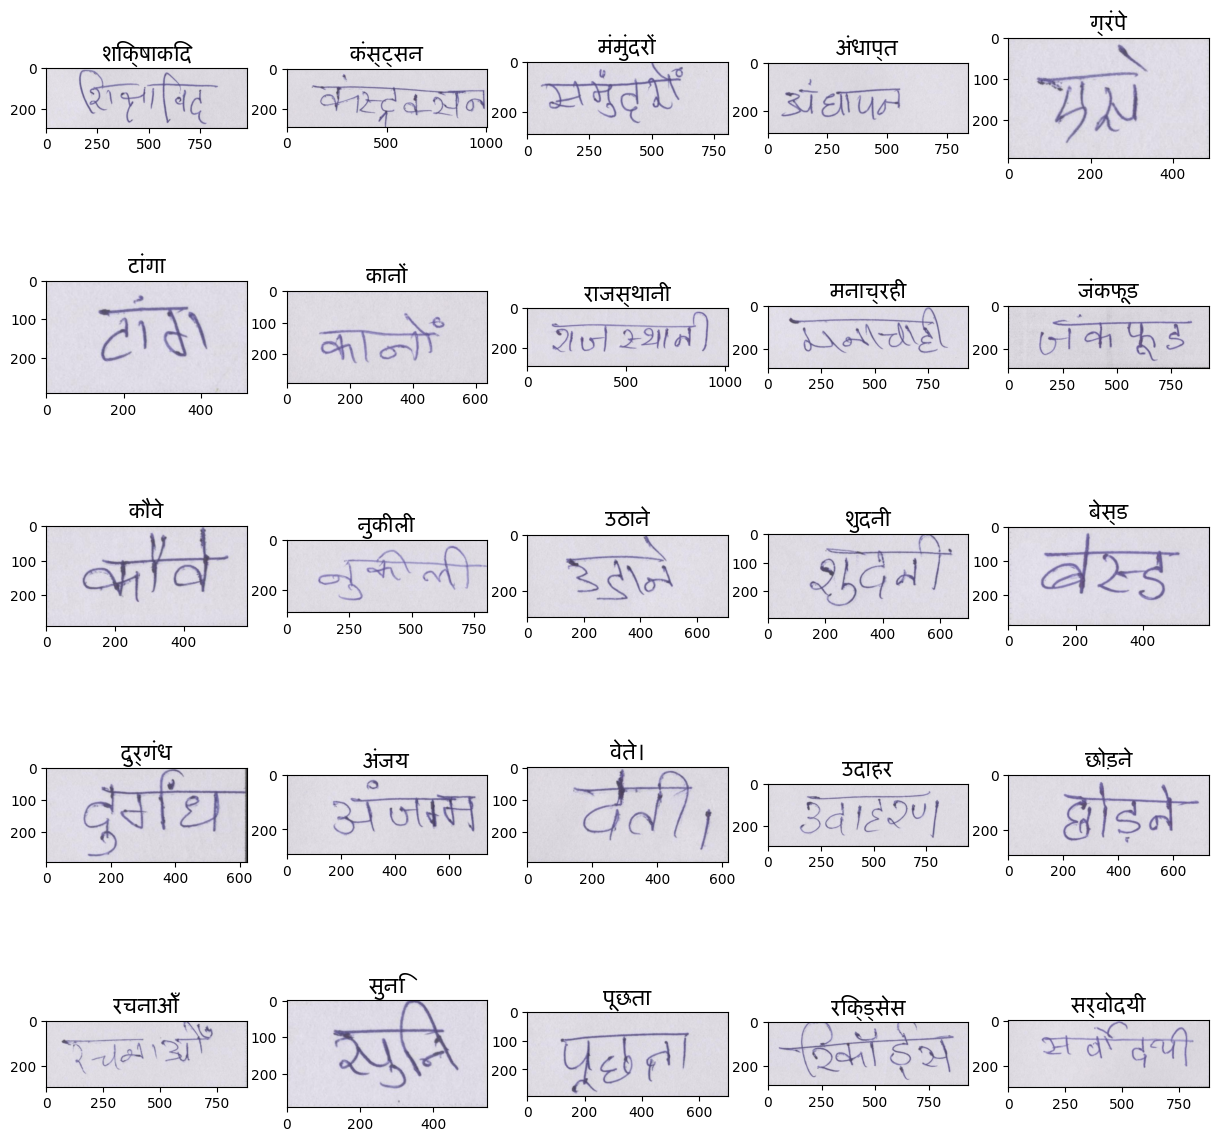

In [49]:
preview_subplot()

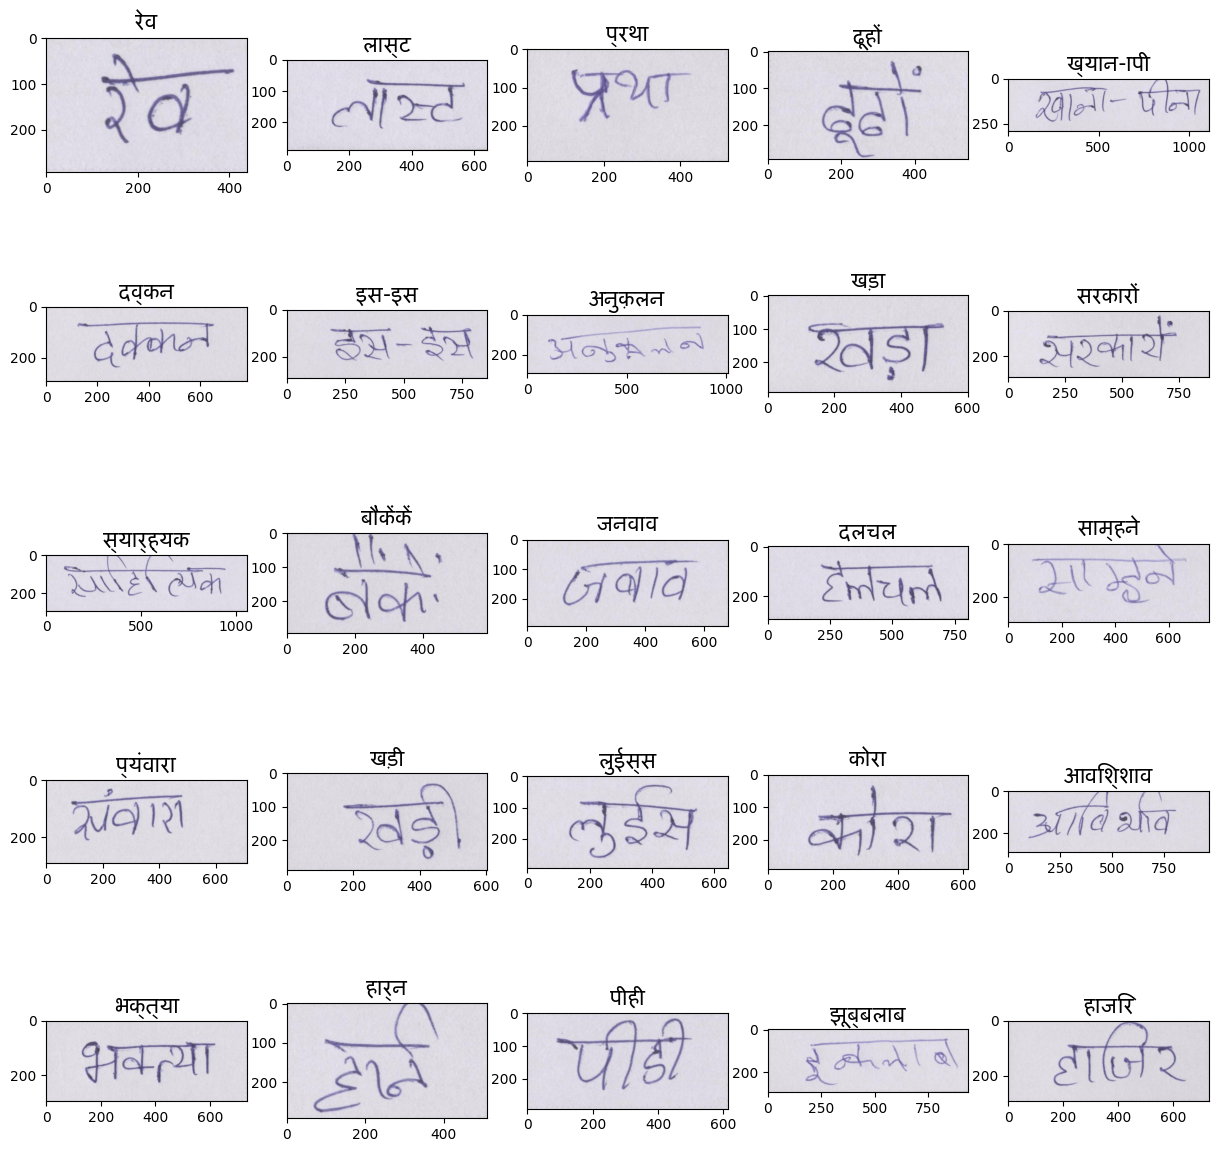

In [50]:
preview_subplot()

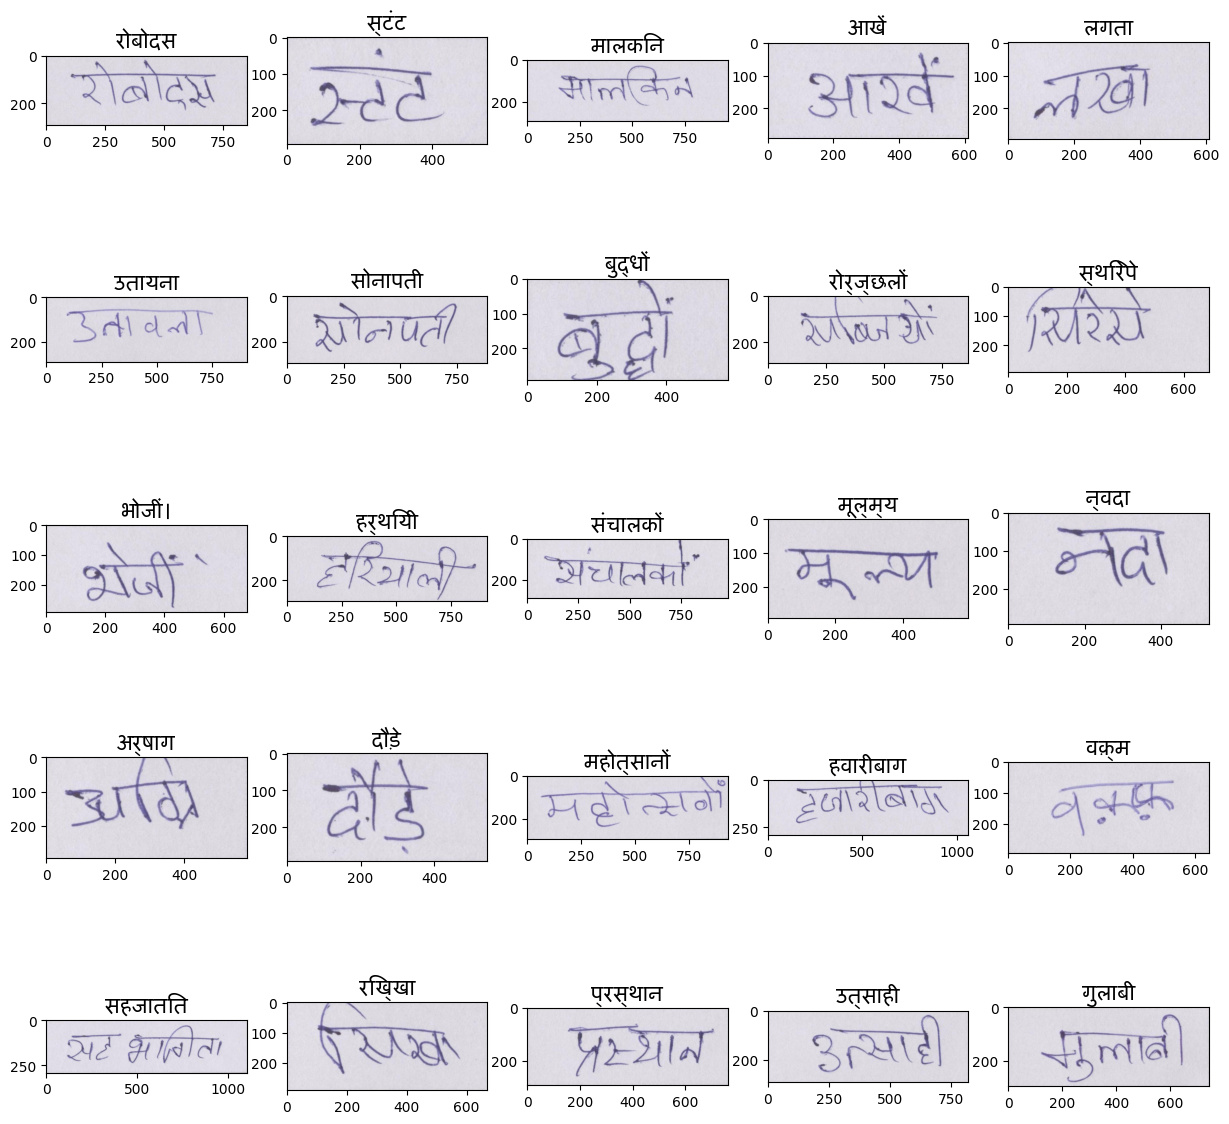

In [51]:
preview_subplot()